In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
# data snapshot
bike_df = pd.read_csv("./data/bike.csv")
bike_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4


In [15]:
bike_df.describe()

,temp,hum,windspeed,cnt,days_since_2011
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.283085,62.789406,12.762576,4504.348837,365.000000
std,8.603397,14.242910,5.192357,1937.211452,211.165812
min,-5.220871,0.000000,1.500244,22.000000,0.000000
25%,7.842925,52.000000,9.041650,3152.000000,182.500000
50%,15.421651,62.666700,12.125325,4548.000000,365.000000
75%,22.804575,73.020850,15.625371,5956.000000,547.500000
max,32.498349,97.250000,34.000021,8714.000000,730.000000


In [10]:
# check data type
bike_df.dtypes

season              object
yr                   int64
mnth                object
holiday             object
weekday             object
workingday          object
weathersit          object
temp               float64
hum                float64
windspeed          float64
cnt                  int64
days_since_2011      int64
dtype: object

In [13]:
# check data if there is any null values
bike_df.isnull().sum()

season             0
yr                 0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
hum                0
windspeed          0
cnt                0
days_since_2011    0
dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# data cleaning
# converting yr to string / categorical variable
if bike_df.yr.dtype != pd.StringDtype:
    bike_df['yr'] = bike_df.yr.astype(str)
    print('convert yr to string')
else:
    print("yr is converted alredy")

yr is converted alredy


In [37]:
# set up blueprint
cols_df = pd.DataFrame(bike_df.dtypes)
cols_df.reset_index(drop=False, inplace=True)
cols_df.rename(columns={"index":"cols",0:'data_types'}, inplace=True)
cols_df['input'] = cols_df.data_types.apply(lambda x: "cat" if x == 'object' else "num")
cols_df.loc[cols_df.cols == 'cnt', 'input'] = 'resp'

In [54]:
# prepare for one hot encoding and ordinal encoding
for item in cols_df.loc[cols_df.input.isin(['cat']),'cols'].to_list():
    print(f"{item}, {bike_df[item].unique()}")

season, ['WINTER' 'SPRING' 'SUMMER' 'FALL']
yr, ['2011' '2012']
mnth, ['JAN' 'FEB' 'MAR' 'APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT' 'NOV' 'DEC']
holiday, ['NO HOLIDAY' 'HOLIDAY']
weekday, ['SAT' 'SUN' 'MON' 'TUE' 'WED' 'THU' 'FRI']
workingday, ['NO WORKING DAY' 'WORKING DAY']
weathersit, ['MISTY' 'GOOD' 'RAIN/SNOW/STORM']


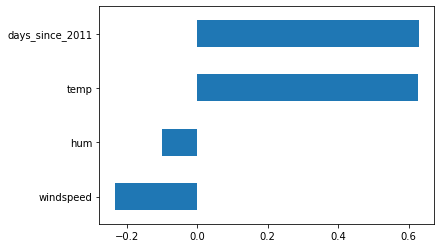

In [76]:
# EDA 
# calculate correlation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
bike_df[cols_df.loc[cols_df.input.isin(['num']),'cols'].to_list()].corrwith(other = bike_df.cnt, axis=0, method='pearson').sort_values().plot(kind='barh')
plt.show()

In [ ]:
# reference
# kfold cross validation, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# l1 and l2 for linear regression, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet